## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.exceptions import NotFittedError

In [2]:
car = pd.read_csv('../Desktop/car_price_prediction.csv')

## Data Cleaning

Check for missing values

In [3]:
print(car.isnull().sum())

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


Dropping duplicates

In [4]:
car.drop_duplicates(subset='ID', inplace=True)

Replacing '-' to '0' in Levy

In [5]:
car['Levy'] = car['Levy'].replace('-', 0)
car['Levy'] = car['Levy'].astype(int)
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Renaming the Mileage column to Mileage(km) and convert the value to int

In [6]:
car['Mileage'] = car['Mileage'].str.replace(' km', '')
car['Mileage'] = car['Mileage'].astype(int)
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Correcting the Doors format

In [7]:
car['Doors'] = car['Doors'].str.replace(r'^0(\d+)-.*$', r'\1', regex=True)
car['Doors'] = car['Doors'].replace(r'\D', '', regex=True)
car['Doors'] = car['Doors'].astype(int)
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4


In [8]:
#checking if there is numbers of doors that are neither 2 or 4
invalid_doors = car[~car['Doors'].isin([2, 4])]
invalid_numbers = invalid_doors['Doors'].unique()

if len(invalid_numbers) > 0:
    print("Invalid numbers in the 'Doors' column:")
    print(invalid_numbers)
else:
    print("All numbers in the 'Doors' column are either 2 or 4.")

Invalid numbers in the 'Doors' column:
[5]


Making a Turbo column and catergorizing the turbo is installed in each car

In [9]:
car['Turbo'] = 0
car.loc[car['Engine volume'].str.contains('Turbo', na=False, case=False), 'Turbo'] = 1
car.head(100)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45330228,32929,0,BMW,428 Sport Line,2013,Coupe,Yes,Petrol,2.0 Turbo,160000,4.0,Automatic,Rear,2,Left wheel,Black,12,1
96,45776745,18817,0,NISSAN,Patrol,1990,Jeep,No,Diesel,2.8 Turbo,333333,4.0,Manual,Rear,4,Left wheel,Black,0,1
97,45749534,4234,0,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,0
98,45789555,15053,0,MERCEDES-BENZ,E 320,2004,Sedan,Yes,Petrol,3.2,214000,6.0,Tiptronic,Rear,4,Left wheel,Grey,8,0


In [10]:
car['Engine volume'] = car['Engine volume'].str.replace('Turbo', '')
car.head(100)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45330228,32929,0,BMW,428 Sport Line,2013,Coupe,Yes,Petrol,2.0,160000,4.0,Automatic,Rear,2,Left wheel,Black,12,1
96,45776745,18817,0,NISSAN,Patrol,1990,Jeep,No,Diesel,2.8,333333,4.0,Manual,Rear,4,Left wheel,Black,0,1
97,45749534,4234,0,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,0
98,45789555,15053,0,MERCEDES-BENZ,E 320,2004,Sedan,Yes,Petrol,3.2,214000,6.0,Tiptronic,Rear,4,Left wheel,Grey,8,0


Check and remove the rows that contain non-english words

In [11]:
non_english_rows = car[car.astype(str).apply(lambda x: x.str.contains(r'[^\x00-\x7F]', regex=True)).any(axis=1)]
print(non_english_rows)

             ID   Price  Levy   Manufacturer                     Model  \
305    45342484   37320  1055  MERCEDES-BENZ                 E 350 ამგ   
949    45799874    8467     0            BMW             318 სასწრაფოდ   
1128   45811575   54255  1848  MERCEDES-BENZ             S 550 ჰიბრიდი   
1367   45695724   18189   697     VOLKSWAGEN               Jetta სპორტ   
1389   45768964    9408   777           FORD   Transit Connect ბენზინი   
2358   45779593   25089     0           სხვა               IVECO DAYLY   
2360   45319704   21500     0  MERCEDES-BENZ          ML 280 სასწრაფოდ   
4792   39223518    9408     0           სხვა                     GONOW   
5075   45703117   25089   917  MERCEDES-BENZ       Sprinter Maxi-ს Max   
5162   45811556   24775     0          LEXUS        IS 250 რესტაილინგი   
5208   45784331   24148     0         TOYOTA             Prius ფლაგინი   
6010   43908528   16621   761         TOYOTA             Prius ჰიბრიდი   
6096   45382432  109764     0  MERCEDE

In [12]:
non_english_pattern = r'[^\x00-\x7F]'

car['Model'] = car['Model'].str.replace(non_english_pattern, '', regex=True)

car['Manufacturer'] = car['Manufacturer'].str.replace(non_english_pattern, '', regex=True)

print(car.head(100))


          ID  Price  Levy   Manufacturer           Model  Prod. year  \
0   45654403  13328  1399          LEXUS          RX 450        2010   
1   44731507  16621  1018      CHEVROLET         Equinox        2011   
2   45774419   8467     0          HONDA             FIT        2006   
3   45769185   3607   862           FORD          Escape        2011   
4   45809263  11726   446          HONDA             FIT        2014   
..       ...    ...   ...            ...             ...         ...   
95  45330228  32929     0            BMW  428 Sport Line        2013   
96  45776745  18817     0         NISSAN          Patrol        1990   
97  45749534   4234     0          HONDA           Civic        1997   
98  45789555  15053     0  MERCEDES-BENZ           E 320        2004   
99  45797276  15458   966        HYUNDAI         Genesis        2009   

     Category Leather interior Fuel type Engine volume  Mileage  Cylinders  \
0        Jeep              Yes    Hybrid           3.5   

In [13]:
#Check and ensure the non-english words are removed
row = car.loc[car['ID'] == 39223518]

print(row)

            ID  Price  Levy Manufacturer  Model  Prod. year Category  \
4792  39223518   9408     0               GONOW        2005     Jeep   

     Leather interior Fuel type Engine volume  Mileage  Cylinders  \
4792              Yes    Petrol           2.3   102000        4.0   

     Gear box type Drive wheels  Doors       Wheel   Color  Airbags  Turbo  
4792        Manual         Rear      4  Left wheel  Silver        2      0  


In [14]:
#Dropped the rows that empty values in the Manufacturer column 
ids_to_drop = [45779593, 39223518]

car = car[~car['ID'].isin(ids_to_drop)]

car.reset_index(drop=True, inplace=True)

Remove outliers in Price, Mileage, and Levy

In [15]:
car['Mileage'] = car['Mileage'].astype(int)
car['Price'] = car['Price'].astype(int)
car['Levy'] = car['Levy'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18922 entries, 0 to 18921
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18922 non-null  int64  
 1   Price             18922 non-null  int64  
 2   Levy              18922 non-null  int64  
 3   Manufacturer      18922 non-null  object 
 4   Model             18922 non-null  object 
 5   Prod. year        18922 non-null  int64  
 6   Category          18922 non-null  object 
 7   Leather interior  18922 non-null  object 
 8   Fuel type         18922 non-null  object 
 9   Engine volume     18922 non-null  object 
 10  Mileage           18922 non-null  int64  
 11  Cylinders         18922 non-null  float64
 12  Gear box type     18922 non-null  object 
 13  Drive wheels      18922 non-null  object 
 14  Doors             18922 non-null  int64  
 15  Wheel             18922 non-null  object 
 16  Color             18922 non-null  object

Mileage

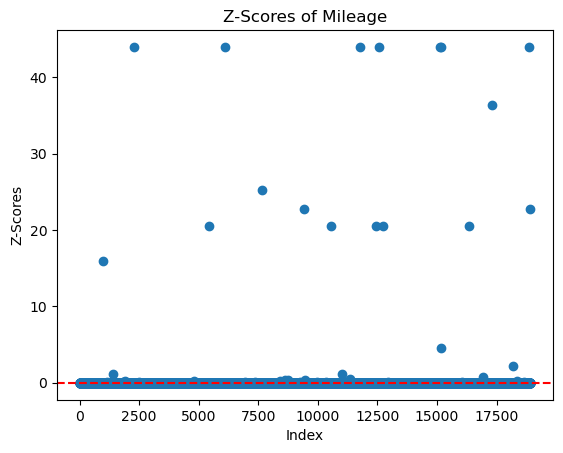

In [16]:
car['Z-Scores of Mileage'] = (car['Mileage'] - car['Mileage'].mean()) / car['Mileage'].std()

rows_above_2 = car[car['Z-Scores of Mileage'] > 2]

plt.scatter(car.index, car['Z-Scores of Mileage'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-Scores')
plt.title('Z-Scores of Mileage')
plt.show()


In [17]:
car = car[car['Z-Scores of Mileage'] <= 2]
car.drop('Z-Scores of Mileage', axis=1, inplace=True)

Price

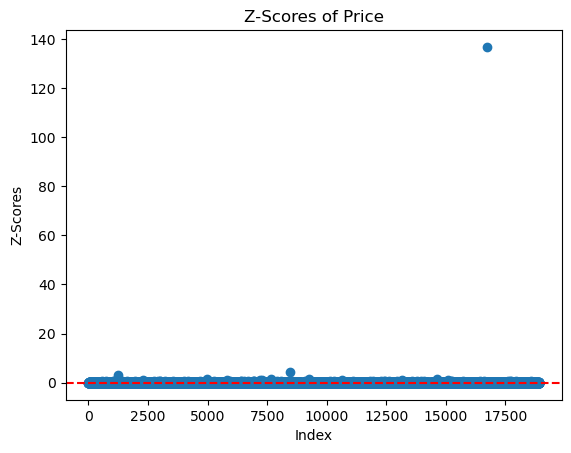

In [18]:
car['Z-Scores of Price'] = (car['Price'] - car['Price'].mean()) / car['Price'].std()

rows_above_2 = car[car['Z-Scores of Price'] > 2]

plt.scatter(car.index, car['Z-Scores of Price'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-Scores')
plt.title('Z-Scores of Price')
plt.show()


In [19]:
car = car[car['Z-Scores of Price'] <= 2]
car.drop('Z-Scores of Price', axis=1, inplace=True)

Drop the price less than 500

In [20]:
car=car[car['Price']>500]
display(car[car.Price < 500])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo


Levy

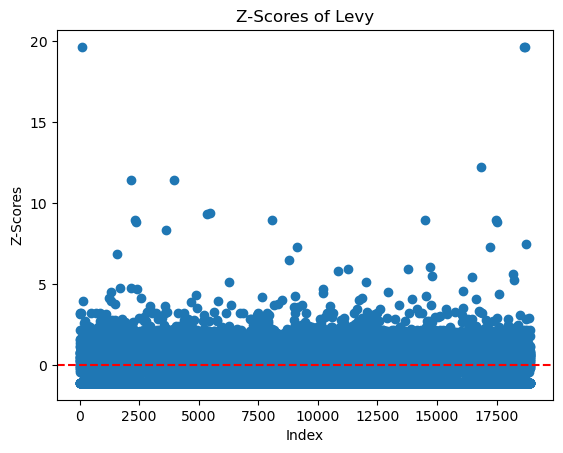

In [21]:
car['Z-Scores of Levy'] = (car['Levy'] - car['Levy'].mean()) / car['Levy'].std()

rows_above_2 = car[car['Z-Scores of Levy'] > 2]

plt.scatter(car.index, car['Z-Scores of Levy'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Z-Scores')
plt.title('Z-Scores of Levy')
plt.show()

In [22]:
car = car[car['Z-Scores of Levy'] <= 2]
car.drop('Z-Scores of Levy', axis=1, inplace=True)

Drop Levy = 0

In [23]:
car=car[car['Levy'] != 0]
display(car[car.Levy == 0])

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo


## Exploratory Data Analysis

Top 10 manufacturers

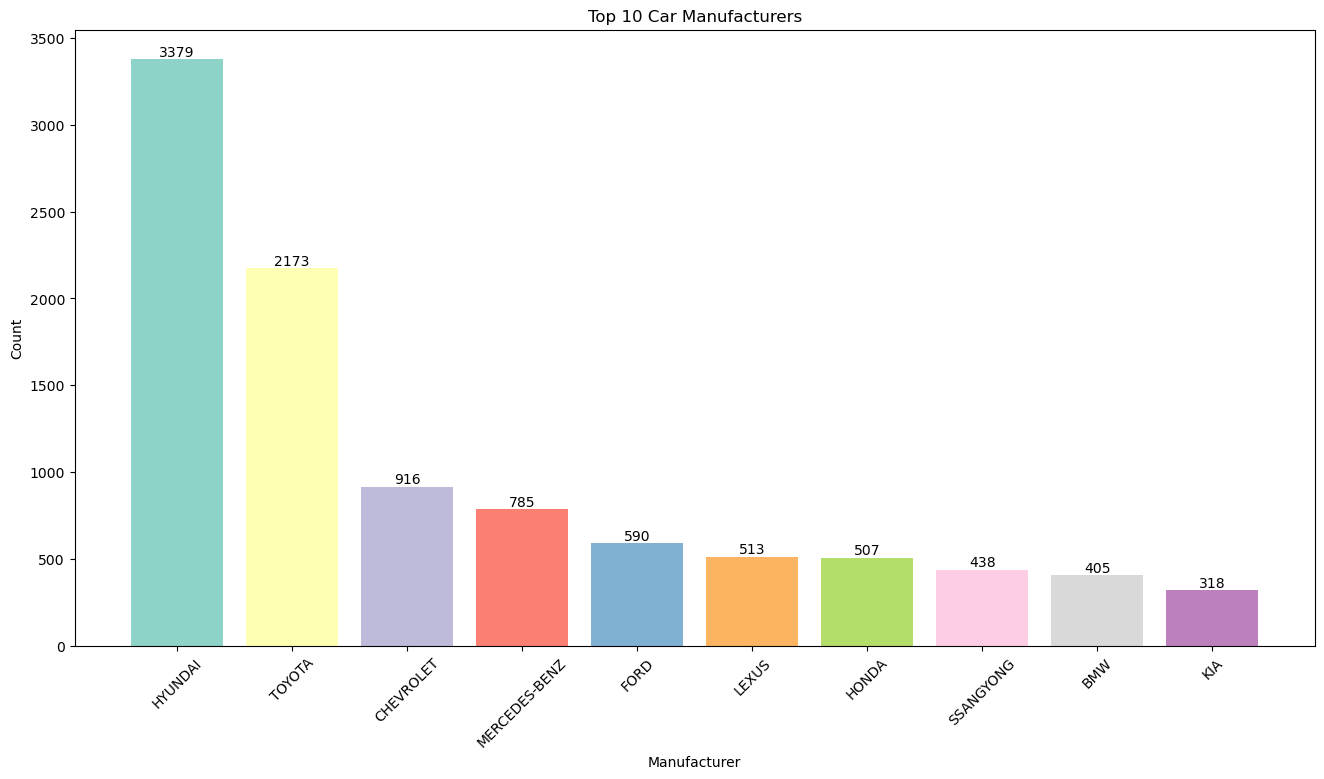

In [24]:
# Count the occurrences of each manufacturer
manufacturer_counts = car['Manufacturer'].value_counts()

# Select the top 10 manufacturers
top_10_manufacturers = manufacturer_counts.head(10)


fig = plt.figure(figsize=(16, 8))

# Create a colormap for the bars
colormap = plt.cm.Set3(range(len(top_10_manufacturers)))

# Plot the bar chart with different colors
plt.bar(top_10_manufacturers.index, top_10_manufacturers.values, color=colormap)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Top 10 Car Manufacturers')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Annotate the bars with count values
for i, count in enumerate(top_10_manufacturers.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

# Display the bar chart
plt.show()

Top 10 manufacturers by average price

<Figure size 1600x800 with 0 Axes>

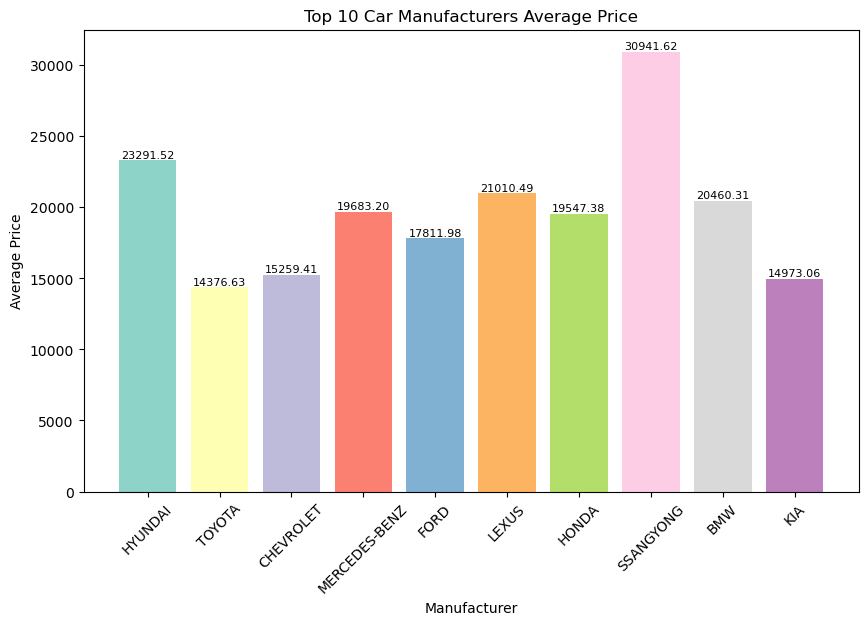

In [25]:
# Calculate the count and average price for each manufacturer
manufacturer_stats = car.groupby('Manufacturer')['Price'].agg(['count', 'mean'])

# Select the top 10 manufacturers by count
top_10_manufacturers = manufacturer_stats.nlargest(10, 'count')

fig = plt.figure(figsize=(16, 8))


# Create a colormap for the bars
colormap = plt.cm.Set3(range(len(top_10_manufacturers)))

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_manufacturers.index, top_10_manufacturers['mean'], color=colormap)
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Average Price')
ax.set_title('Top 10 Car Manufacturers Average Price')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

for i, mean_price in enumerate(top_10_manufacturers['mean']):
    ax.text(i, mean_price, f'{mean_price:.2f}', ha='center', va='bottom', fontsize = 8)

# Display the bar chart
plt.show()


Average car price by fuel type 

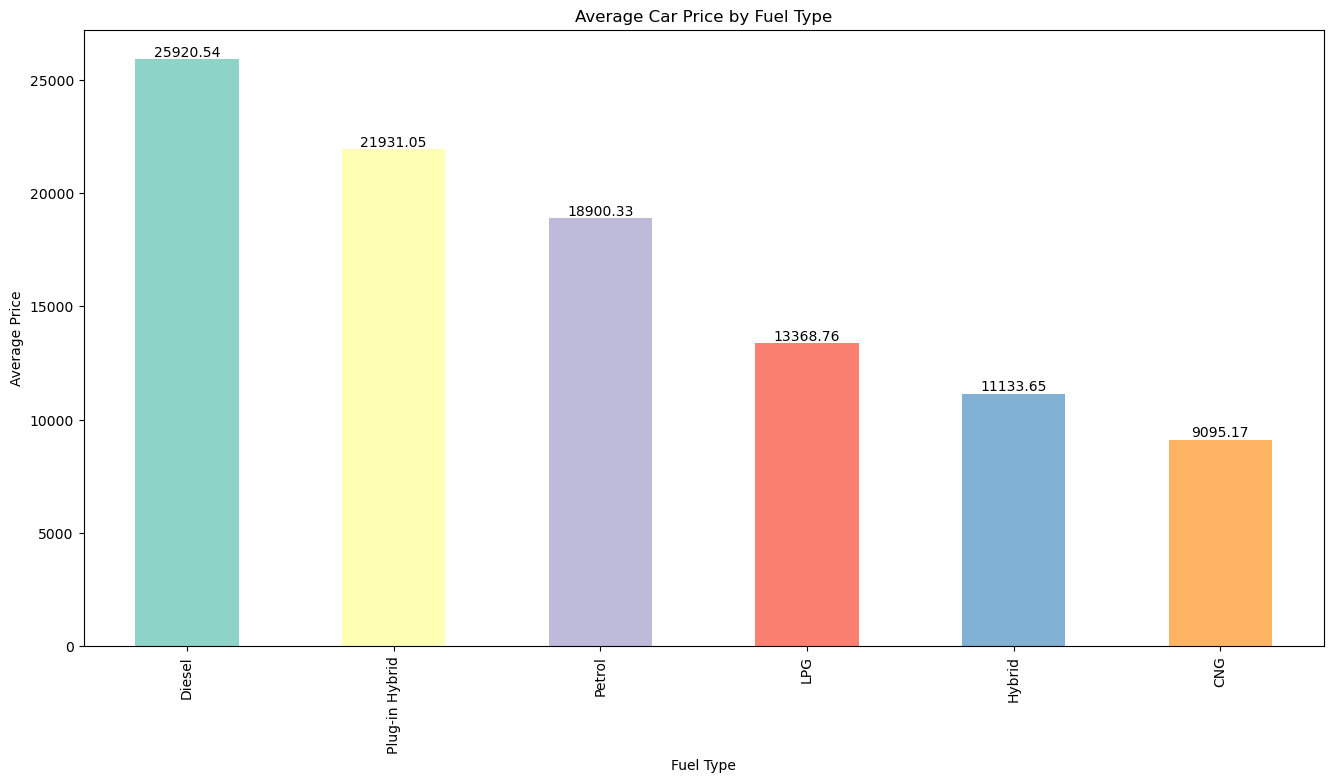

In [26]:
# Calculate the average car price by fuel type
average_price_by_fuel_type = car.groupby('Fuel type')['Price'].mean()

# Sort the average prices in descending order
average_price_by_fuel_type = average_price_by_fuel_type.sort_values(ascending=False)

colormap = plt.cm.Set3(np.arange(len(average_price_by_fuel_type)))

# Plot the bar chart
fig = plt.figure(figsize=(16, 8))
bar_plot = average_price_by_fuel_type.plot(kind='bar', color=colormap)
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Car Price by Fuel Type')

# Add value labels to the bars
for index, value in enumerate(average_price_by_fuel_type):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Display the bar chart
plt.show()


Median car price by wheel

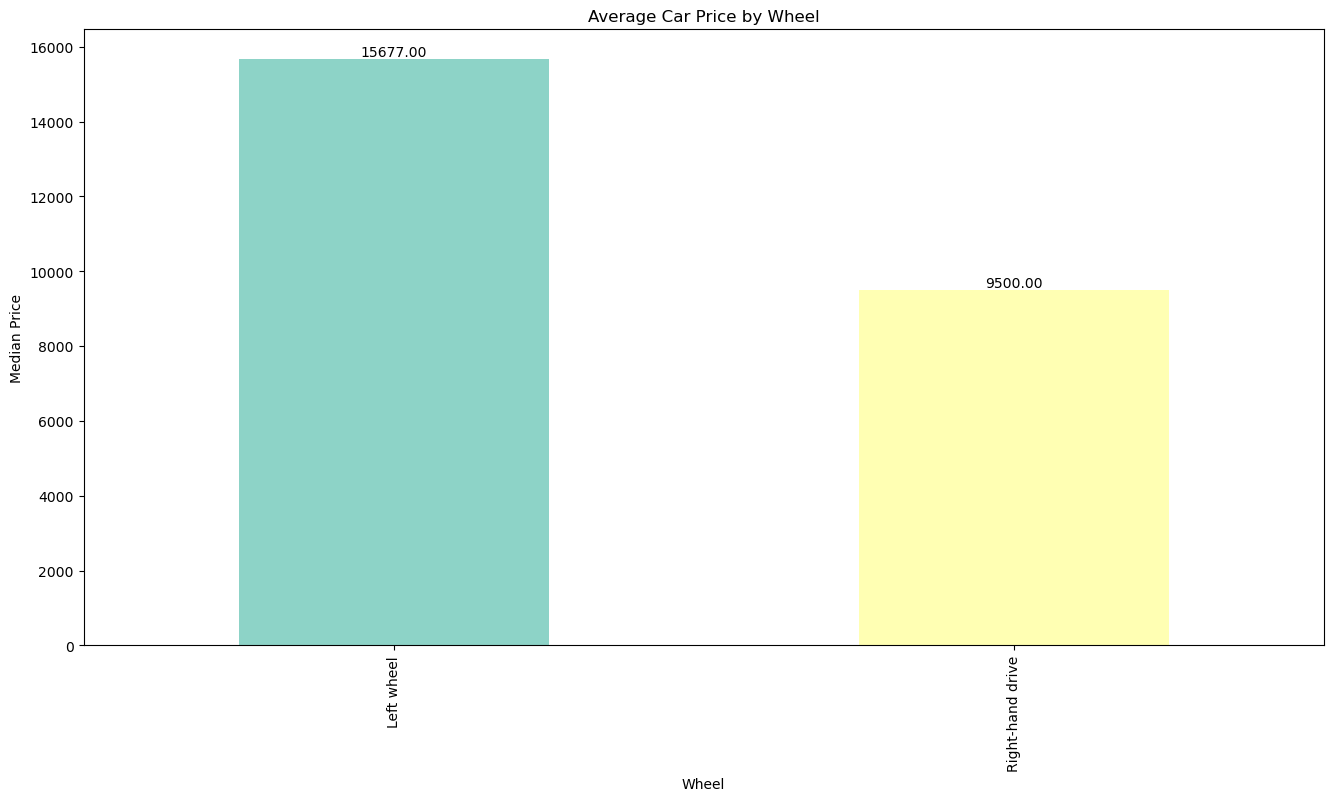

In [27]:
# Calculate the average car price by wheel
median_price_by_wheel = car.groupby('Wheel')['Price'].median()

colormap = plt.cm.Set3(np.arange(len(median_price_by_wheel)))

# Plot the bar chart
fig = plt.figure(figsize=(16, 8))
bar_plot = median_price_by_wheel.plot(kind='bar', color=colormap)
plt.xlabel('Wheel')
plt.ylabel('Median Price')
plt.title('Average Car Price by Wheel')

# Add value labels to the bars
for index, value in enumerate(median_price_by_wheel):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Display the bar chart
plt.show()


Average car price by color

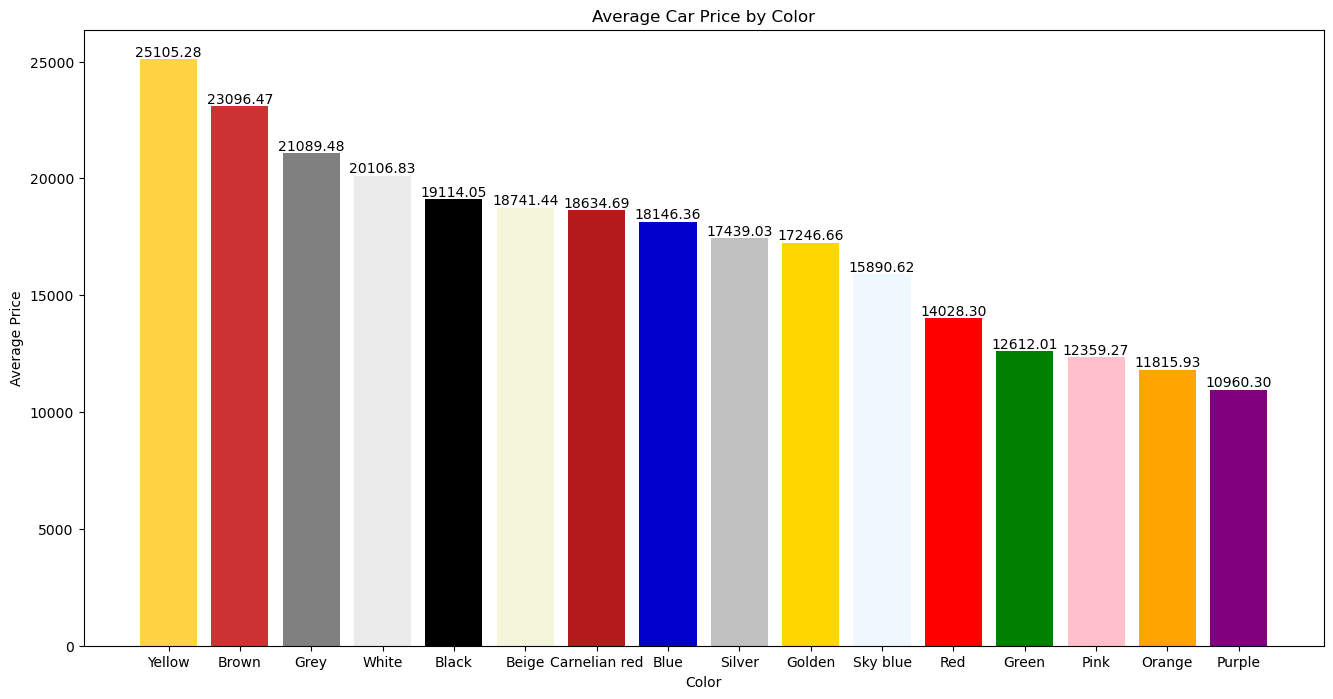

In [28]:
# Calculate the average car price by color
average_price_by_color = car.groupby('Color')['Price'].mean()

# Sort the average prices in descending order
average_price_by_color = average_price_by_color.sort_values(ascending=False)

# Define the colors manually
colormap = [ '#ffd343', '#CD3333', '#808080', '#EBEBEB', 'black', '#F5F5DC', '#b31b1b', '#0000CD', 'silver', '#FFD700', '#F0F8FF', 'red', 'green', 'pink', 'orange', 'purple']

# Plot the bar chart with manual colors
fig = plt.figure(figsize=(16, 8))
bar_plot = plt.bar(average_price_by_color.index, average_price_by_color.values, color=colormap)
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.title('Average Car Price by Color')

# Add value labels to the bars
for bar, value in zip(bar_plot, average_price_by_color.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

# Display the bar chart
plt.show()


Median car price by gear box type

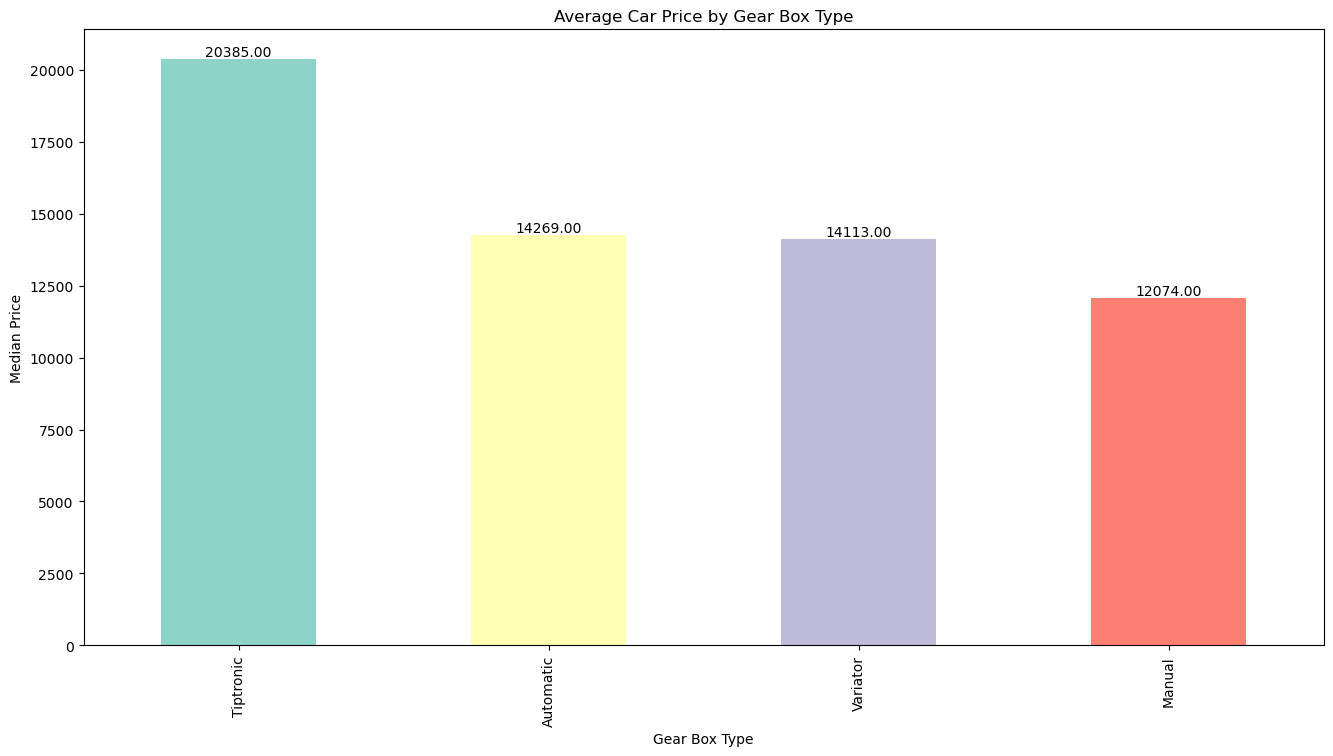

In [29]:
# Calculate the average car price by fuel type
median_price_by_gear_box_type = car.groupby('Gear box type')['Price'].median()

# Sort the average prices in descending order
median_price_by_gear_box_type = median_price_by_gear_box_type.sort_values(ascending=False)

colormap = plt.cm.Set3(np.arange(len(median_price_by_gear_box_type)))

# Plot the bar chart
fig = plt.figure(figsize=(16, 8))
bar_plot = median_price_by_gear_box_type.plot(kind='bar', color=colormap)
plt.xlabel('Gear Box Type')
plt.ylabel('Median Price')
plt.title('Average Car Price by Gear Box Type')

# Add value labels to the bars
for index, value in enumerate(median_price_by_gear_box_type):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Display the bar chart
plt.show()


Average car price by drive wheels

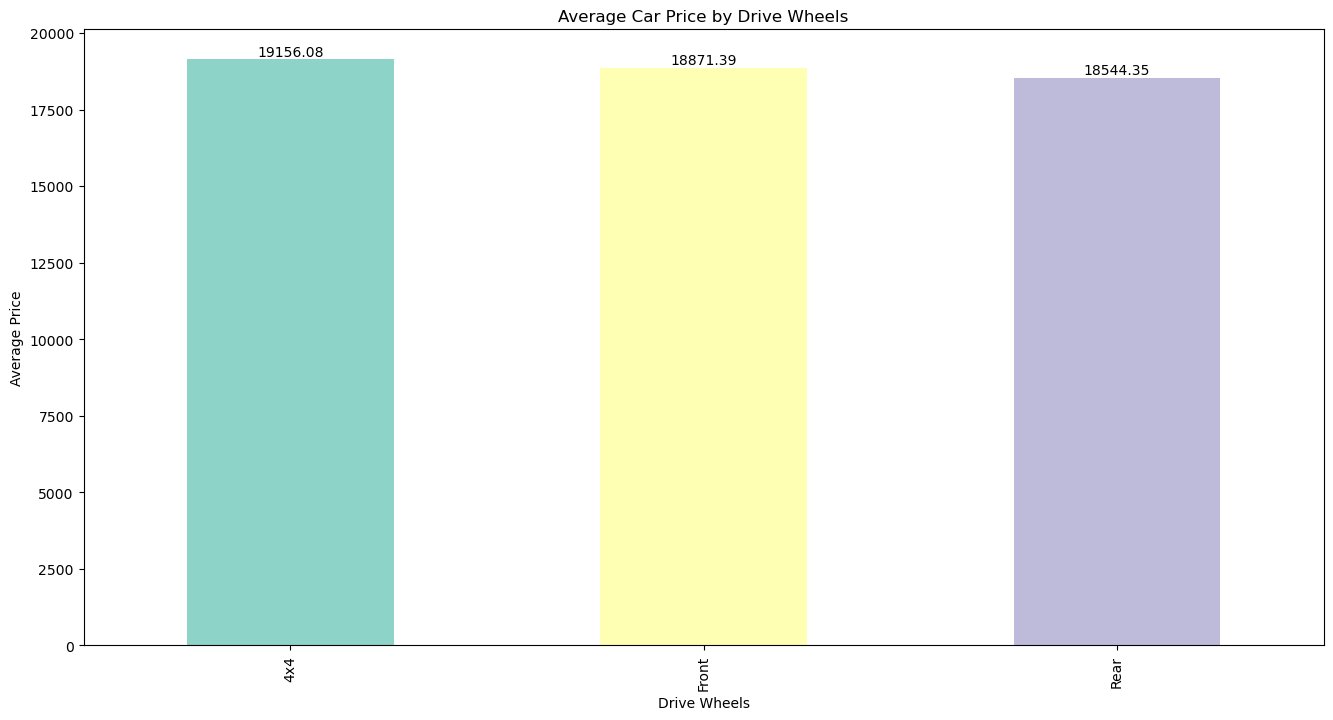

In [30]:
# Calculate the average car price by drive wheels
average_price_by_drive_wheels = car.groupby('Drive wheels')['Price'].mean()

# Sort the average prices in descending order
average_price_by_drive_wheels = average_price_by_drive_wheels.sort_values(ascending=False)

colormap = plt.cm.Set3(np.arange(len(average_price_by_drive_wheels)))

# Plot the bar chart
fig = plt.figure(figsize=(16, 8))
bar_plot = average_price_by_drive_wheels.plot(kind='bar', color=colormap)
plt.xlabel('Drive Wheels')
plt.ylabel('Average Price')
plt.title('Average Car Price by Drive Wheels')

# Add value labels to the bars
for index, value in enumerate(average_price_by_drive_wheels):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Display the bar chart
plt.show()


Car price by production year

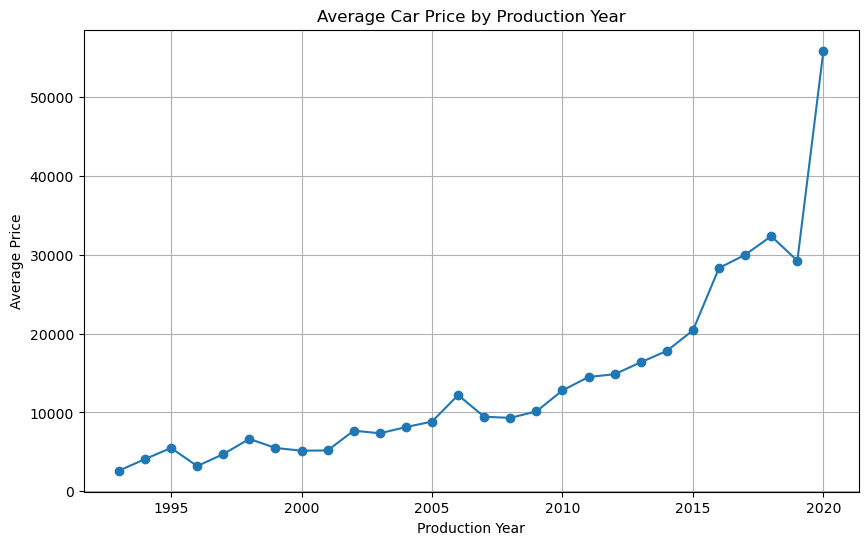

In [31]:

# Group by production year and calculate the average car price
average_price_by_production_year = car.groupby('Prod. year')['Price'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_production_year.index, average_price_by_production_year.values, marker='o', linestyle='-')
plt.xlabel('Production Year')
plt.ylabel('Average Price')
plt.title('Average Car Price by Production Year')
plt.grid(True)

# Display the line plot
plt.show()


Car price by category

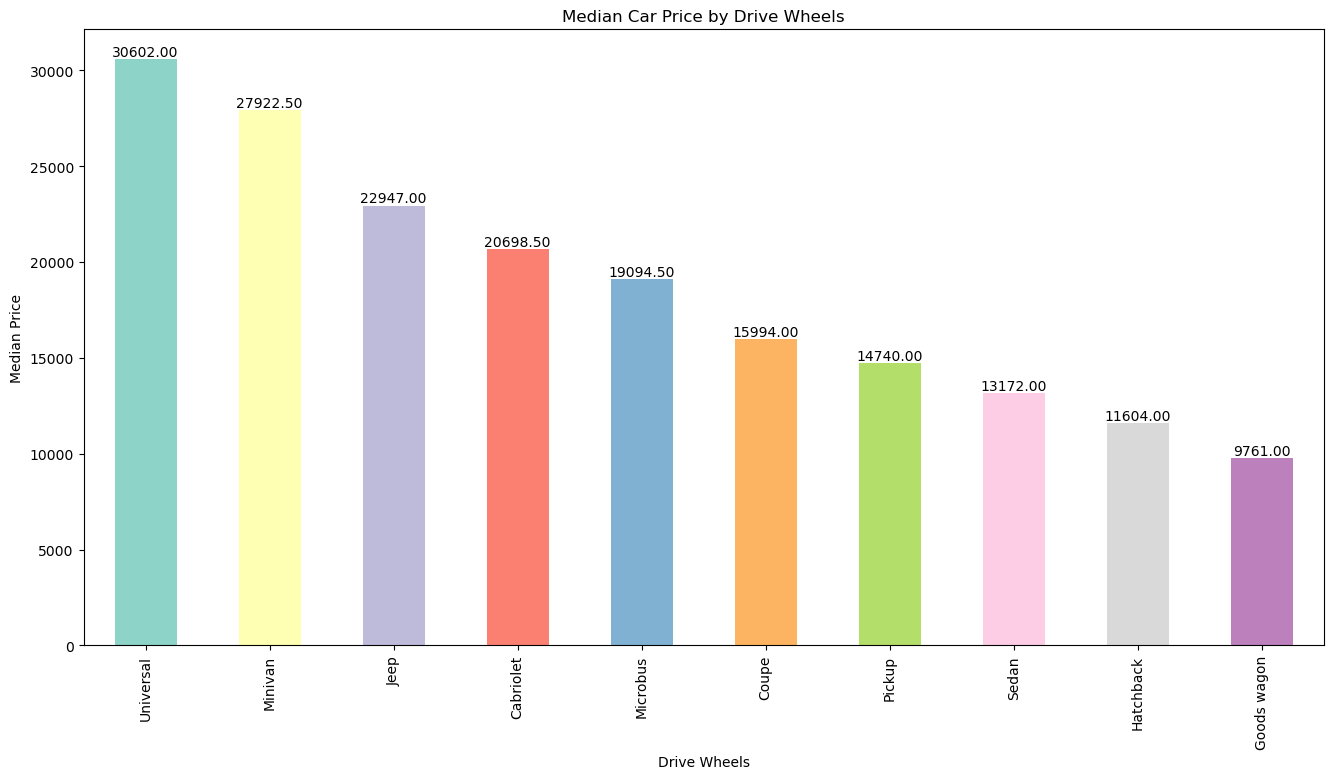

In [32]:
# Calculate the average car price by drive wheels
median_price_by_category = car.groupby('Category')['Price'].median()

# Sort the average prices in descending order
median_price_by_category = median_price_by_category.sort_values(ascending=False)

colormap = plt.cm.Set3(np.arange(len(median_price_by_category)))

# Plot the bar chart
fig = plt.figure(figsize=(16, 8))
bar_plot = median_price_by_category.plot(kind='bar', color=colormap)
plt.xlabel('Drive Wheels')
plt.ylabel('Median Price')
plt.title('Median Car Price by Drive Wheels')

# Add value labels to the bars
for index, value in enumerate(median_price_by_category):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Display the bar chart
plt.show()


Correlation Matrix

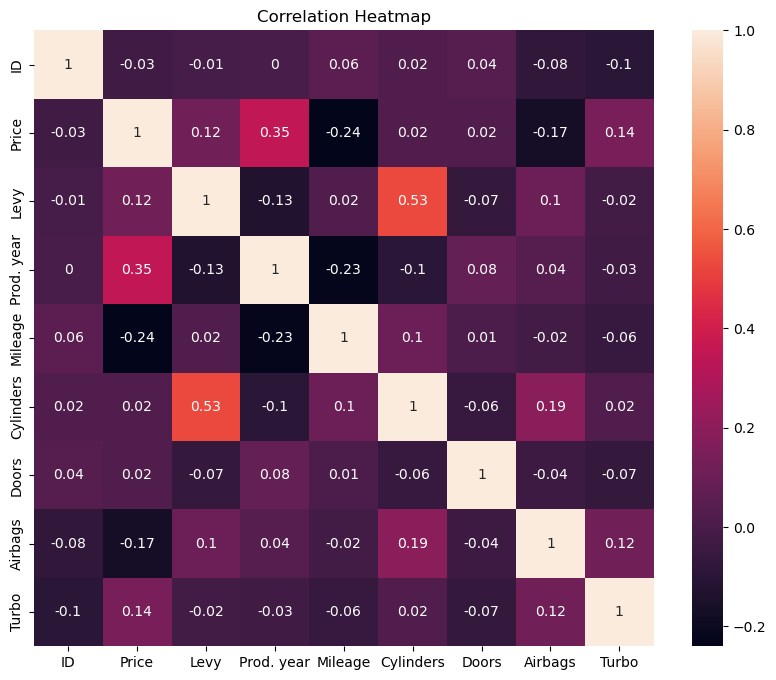

In [33]:
corr = car.corr().round(2)

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

Pairplot

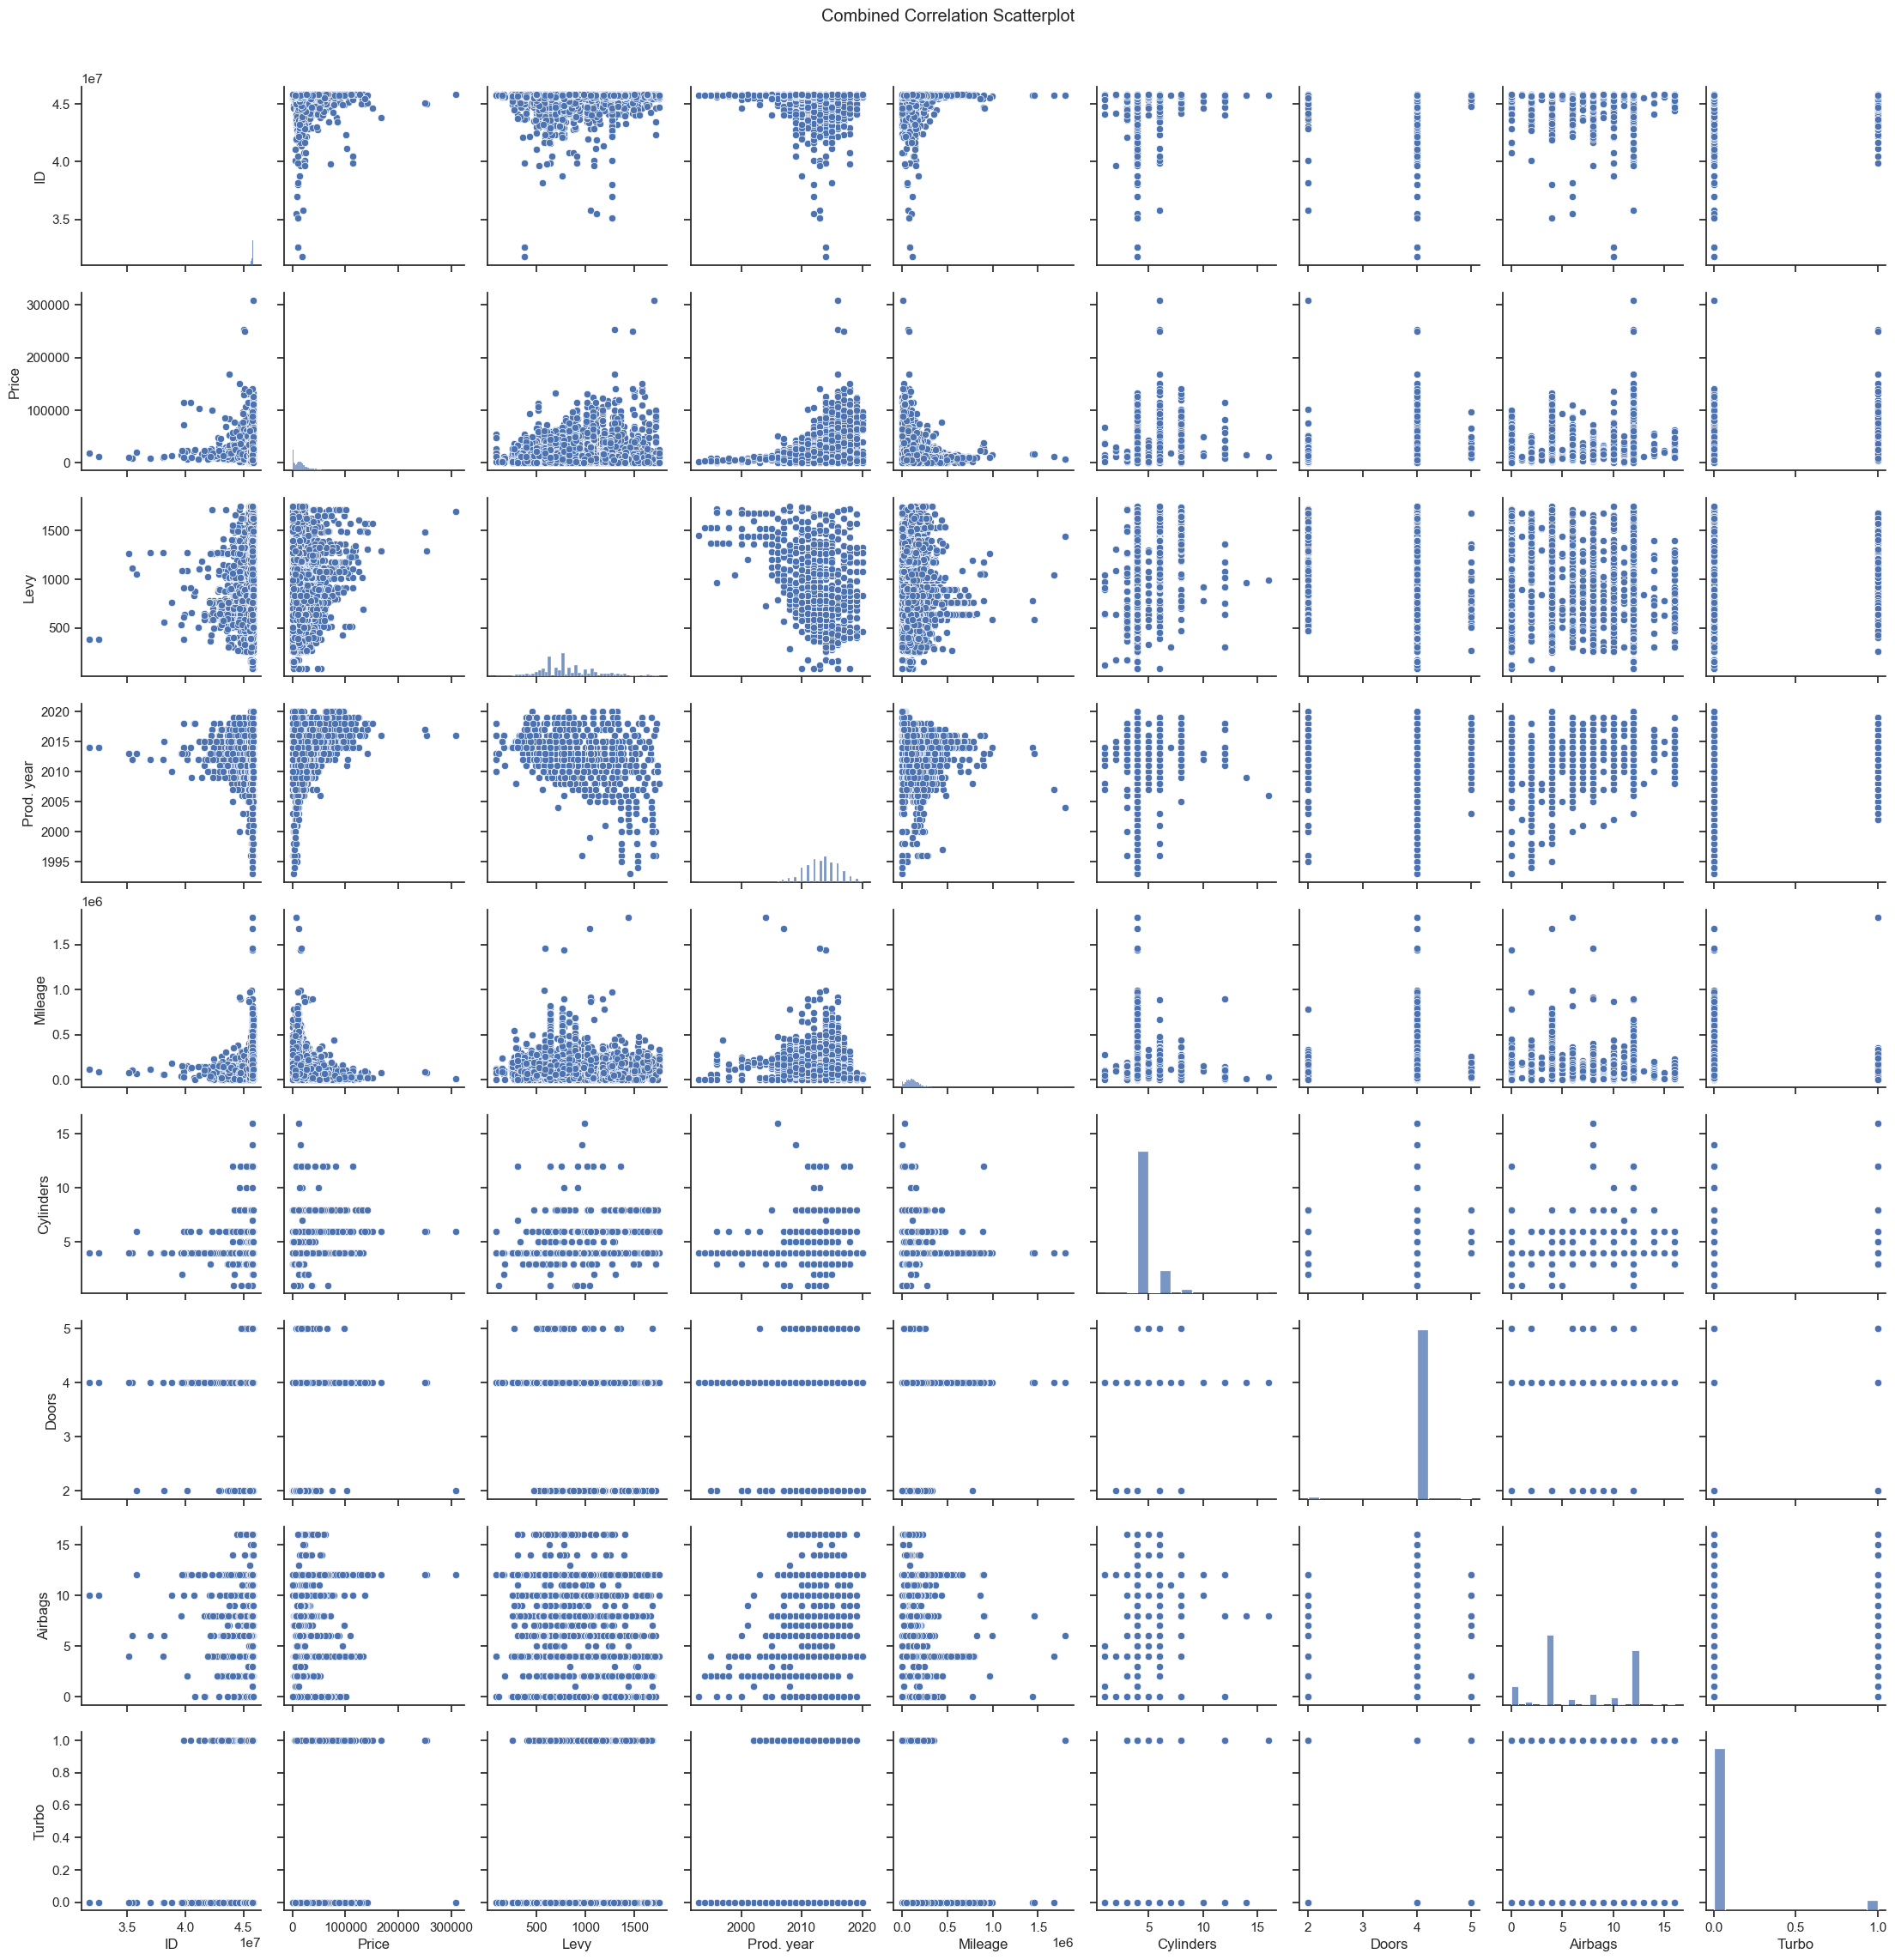

In [34]:
# Create a pairplot
sns.set(style="ticks")
sns.pairplot(car, kind="scatter")

# Set the title of the plot
plt.suptitle("Combined Correlation Scatterplot", y=1.02)

# Display the plot
plt.show()

## Model Building

In [35]:
numerical_columns=["Levy","Prod. year","Doors","Engine volume", "Mileage", "Cylinders", "Airbags"]
categorical_columns=["Manufacturer","Model","Category","Leather interior","Fuel type","Gear box type","Drive wheels","Wheel","Color","Turbo"]

In [36]:
num_cars = car[numerical_columns]
y = car['Price']
cat_cars = car[categorical_columns]

In [37]:
Imputer = SimpleImputer(strategy='median')

Imputer.fit(num_cars)
#Displaying medians of every numveric column we have
display(Imputer.statistics_)
num_cars = Imputer.transform(num_cars)

array([7.790e+02, 2.013e+03, 4.000e+00, 2.000e+00, 1.140e+05, 4.000e+00,
       4.000e+00])

In [38]:
scaler = StandardScaler()
num_cars = scaler.fit_transform(num_cars)

In [39]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())])

In [40]:
cat_pipeline = OneHotEncoder()

In [41]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, numerical_columns),
    ('cat',cat_pipeline, categorical_columns)  
])
cars_prepared = full_pipeline.fit_transform(car)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.33, random_state = 1234)

## Hyperparameter Tuning and Model Evaluation

In [66]:
pipelines = {
    'enet': make_pipeline(ElasticNet(random_state = 1234)),
    'lasso': make_pipeline(Lasso(random_state = 1234)),
    'ridge': make_pipeline(Ridge(random_state = 1234)),
    'enet': make_pipeline(ElasticNet(random_state = 1234)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state = 1234)),
    'rf': make_pipeline(RandomForestRegressor(random_state = 1234))
}


In [44]:
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [67]:
hypergrid = {
    'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'lasso__tol': [0.0001],
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
        'elasticnet__tol': [0.0001],
    },
        'rf': {
        'randomforestregressor__min_samples_split': [2, 4, 6],
        'randomforestregressor__min_samples_leaf': [1, 2, 3]
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}


In [68]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=5, n_jobs=-1)
    try: 
        print('Starting Searching for {}'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} as been successfully fit.'.format(algo))
    except NotFittedError as e:
            print(repr(e))

Starting Searching for enet


/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62006774557.59094, tolerance: 170932235.69817138
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72068861264.90125, tolerance: 172921172.6652295
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91126007523.65924, tolerance: 178105345.82356277
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda3

enet as been successfully fit.
Starting Searching for lasso


/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277548802047.3183, tolerance: 170932235.69817138
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288188072456.5373, tolerance: 172921172.6652295
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262928893699.45337, tolerance: 178105345.82356277
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda

/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59695697264.23474, tolerance: 179130020.39006892
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1266138605.6206055, tolerance: 173555809.81198442
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24044056190.07263, tolerance: 173555809.81198442
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/kimothywong/opt/anacond

lasso as been successfully fit.
Starting Searching for ridge
ridge as been successfully fit.
Starting Searching for gb
gb as been successfully fit.
Starting Searching for rf
rf as been successfully fit.


In [72]:
fit_models['rf'].predict(x_test)

array([41514.07      , 14646.48      ,   916.88      , ...,
       22058.86666667, 20920.71      ,  4051.12      ])

## Evaluation

In [73]:
for algo, model in fit_models.items():
    yhat = model.predict(x_test) 
    print('{} scores - R2: {} MAE: {}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

enet scores - R2: 0.4735798569615026 MAE: 8236.632963847765
lasso scores - R2: 0.46961364474674017 MAE: 8213.23499068634
ridge scores - R2: 0.4761518911243867 MAE: 8215.432218480028
gb scores - R2: 0.6120003999512053 MAE: 6640.984747381609
rf scores - R2: 0.7431110131117324 MAE: 4002.9266976468807


In [74]:
best_model = fit_models['rf']